In [1]:
#modify codes from https://acadgild.com/blog/random-forest-algorithm-regression
#
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
import pyreadr #read .Rda file
import pyreadstat #read stata

In [2]:
##work from Stata file

In [3]:
#data from Standfirm trial
#dtafile = './goal1.dta'
#df, meta = pyreadstat.read_dta(dtafile)
#df.head()

#data from .Rda
#datafile='./newdat261219.train.Rda'
#result = pyreadr.read_r(datafile)
#result #OrderDict class
#print(result.keys()) #odict_keys(['newdat.train'])
#newdat.train = result['newdat.train'] # extract the pandas data frame for object df1


In [4]:
#data 
dftrain=pd.read_csv("newdat261219.train.csv")
dftest=pd.read_csv("newdat261219.test.csv")
#dftrain.head()
#dftrain.tail()

In [5]:
#iloc integer location
#X = df.iloc[:,:-1] #row by column, select all columns except remove last column
#y = df.iloc[:,-2] #or y = df['SodbyPot'] second last column

#create new columns
dftrain['changefrs12m'] = dftrain['_12m_frs1']-dftrain['base_frs1']
dftest['changefrs12m'] = dftest['_12m_frs1']-dftest['base_frs1']

##################
#test changefrs12m
#poor results
##################

#drop train
#x_training_set = dftrain.drop(['base_frs1','_12m_frs1','changefrs12m'],axis=1) #axis=1 refers to column
#y_training_set = dftrain['changefrs12m']
#drop test
#x_test_set = dftest.drop(['base_frs1','_12m_frs1','changefrs12m'],axis=1) #axis=1 refers to column
#y_test_set = dftest['changefrs12m']


###########################
#test prediction of frs 12m
###########################
#drop train
x_training_set = dftrain.drop(['_12m_frs1','changefrs12m'],axis=1) #axis=1 refers to column
y_training_set = dftrain['_12m_frs1']
#drop test
x_test_set = dftest.drop(['_12m_frs1','changefrs12m'],axis=1) #axis=1 refers to column
y_test_set = dftest['_12m_frs1']

In [6]:
#Identify the predictor variables and encode any string variables to equivalent integer codes 
dftrain['Marital_Status'],_ = pd.factorize(dftrain['Marital_Status'])
dftrain['LivStat'],_ = pd.factorize(dftrain['LivStat'])
dftrain['FluEng'],_ = pd.factorize(dftrain['FluEng'])
dftrain['HighEd'],_ = pd.factorize(dftrain['HighEd'])
dftrain['Marital_Status'],_ = pd.factorize(dftrain['Marital_Status'])
dftrain['SocClass'],_ = pd.factorize(dftrain['SocClass'])
dftrain['Male1'],_ = pd.factorize(dftrain['Male1'])
dftrain['base_proteinuria'],_ = pd.factorize(dftrain['base_proteinuria'])

In [7]:
n_estimators=100
# Fit regression model
# Estimate the score on the entire dataset, with no missing values
model = RandomForestRegressor(random_state=0, n_estimators=n_estimators)
model.fit(x_training_set, y_training_set)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [8]:
from tabulate import tabulate
headers = ["name", "score"]
values = sorted(zip(x_training_set, model.feature_importances_), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))


name                       score
base_frs1            0.704963
base_CreatExcr       0.0227574
base_age             0.0220272
base_meanDBP         0.0201375
base_Glu             0.0200439
base_SBP2            0.0177132
base_Weight          0.0156328
base_dep             0.013984
base_salt_calc       0.013653
base_lhs             0.0134158
base_Chol            0.0121165
SodbyPot             0.0120609
base_anx             0.011216
Unnamed: 0           0.0110291
SocClass             0.0100457
base_HbA1c           0.00935582
base_SodExcr         0.00883726
base_Veg_serves31    0.00868818
Marital_Status       0.00782915
base_PotExcr         0.00712625
HighEd               0.00697253
IHDHist38d           0.00438723
LivStat              0.00318519
base_AlcUse          0.00301652
Male1                0.0029659
AFHist38f            0.00277135
base_proteinuria     0.00276647
base_Fruit_serves32  0.00264366
StrokeHist           0.00246847
CarotStenHist        0.00246278
base_Ev_smoke1       0.0011

In [9]:
importances = model.feature_importances_
std = np.std([model.feature_importances_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

Feature ranking:


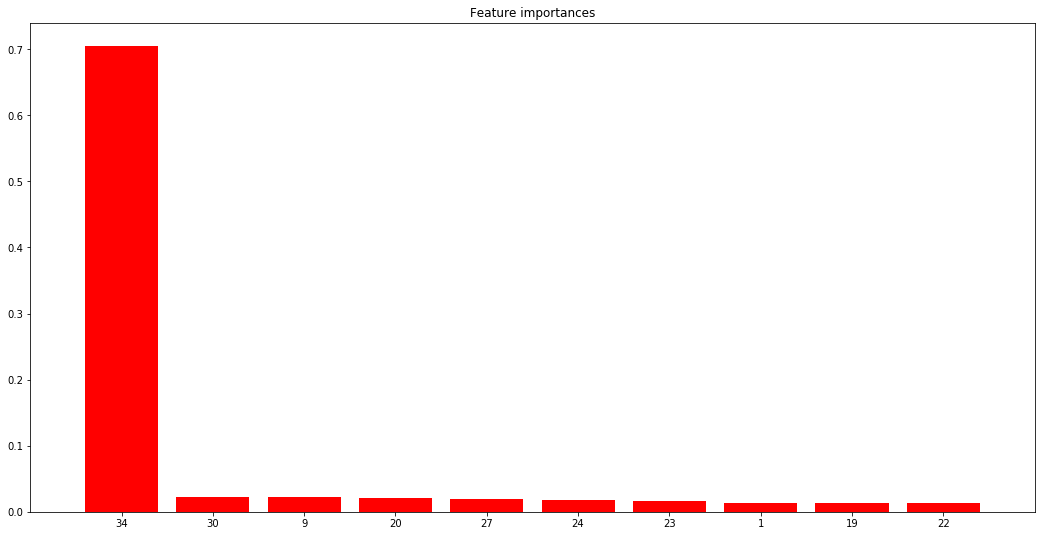

In [10]:
plt.figure(figsize=(18,9))
plt.title("Feature importances")
n=10
_ = plt.bar(range(n), importances[indices][:n], color="r", yerr=std[indices][:n])
plt.xticks(range(n), indices)
plt.xlim([-1, n])
plt.show()

#plt.barh(range(len(indices)), importances[indices], color='b', align='center')
#>>> plt.yticks(range(len(indices)), [features[i] for i in indices])
#>>> plt.xlabel('Relative Importance')
#>>> plt.show()

In [11]:
#Model parameters study :
#The coefficient R^2 is defined as (1 – u/v), where u is the residual sum of squares ((y_true – y_pred) ** 2).sum() and v is the total sum of squares ((y_true – y_true.mean()) ** 2).sum(). 
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(x_training_set,y_training_set)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('coefficient of determination R^2 of the prediction.: ',model_score)
y_predicted = model.predict(x_test_set)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test_set, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test_set, y_predicted))



coefficient of determination R^2 of the prediction.:  0.9518084916879863
Mean squared error: 141.08
Test Variance score: 0.50


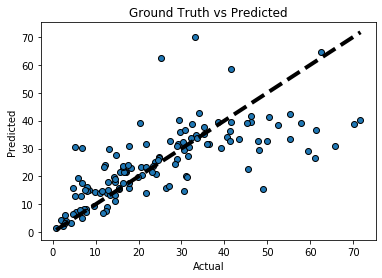

In [12]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()

ax.scatter(y_test_set, y_predicted, edgecolors=(0, 0, 0))

ax.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'k--', lw=4)

ax.set_xlabel('Actual')

ax.set_ylabel('Predicted')

ax.set_title("Ground Truth vs Predicted")

plt.show()